<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Performance_Loss_metric_Enropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

### performance metric

"""

Accuracy = correct prediction/ total prediction
"""
## Accurcy metric
def get_accuracy(truth, predictions, threshold=0.5 ,roundoff = 2):
    """
    Args:
     Truth : Truth can be Boolean(False, Truth), Int(0,1) or float(0,1)
     predictyions:number between 0 and 1 Inclusive
     threshold:  we convert predictons to ls if they are above this value
     roundof = report accircay to how many decimals.
   Return:
     accuracy:number converted diivded by total predictions  
    """
    truth = np.array(truth) == (1|True)
    predicted=np.array(predictions) >= threshold
    matches= sum(predicted == truth)
    accuracy =  float(matches) /len(truth)
    return round(accuracy,roundoff)
    
## Cross entorpy is loss fucntion:
"""
  " Are your 1 's  near 1.
    log(1) = 0  -> no penality
    log(0) = inf -> big penality
"""

def get_loss(predictions,truth):
    # Our methods will be using cross entropy loss.
    return -np.mean( truth * np.log(predictions) + ( 1- truth) * np.log(1-  predictions))

In [14]:
##Try it out:;
 acc = get_accuracy(truth= [0,False,1],predictions=[0.2,0.7,0.6])
 print('Accuracy is :' +str(acc) + '.')

Accuracy is :0.67.


In [66]:
## Compare loss fuction with perfromance metrics:
## Simulate certain situations..
loss = []
acc = []
for i in range(1000):
    for n in [10 ,100,1000]:
        p = np.random.uniform(0.01 ,0.99,(1,1))
        y = np.random.binomial(1,p,(n,1))
        x = np.random.uniform(0.01,0.99,(n,1))
        acc = np.append(acc,get_accuracy(truth=y,predictions=x, roundoff=6))
        loss = np.append(loss,get_loss(predictions=x,truth=y))
df = pd.DataFrame({'accuracy':acc,'cross-entropy': loss}) 

df.tail()

,accuracy,cross-entropy
2995,0.470,1.044196
2996,0.519,0.931480
2997,0.500,1.073832
2998,0.540,0.981309
2999,0.485,0.992219


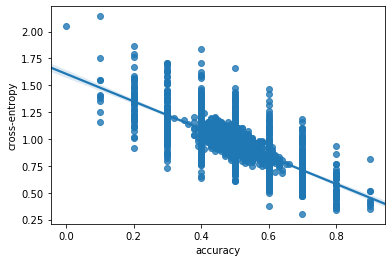

In [26]:
### Visualize with seaborne:

%matplotlib inline
sns.regplot(x= "accuracy",y = 'cross-entropy', data= df)


In [0]:
## Commit to some perfomance set up like 80%
## to producytiionize adn  launch..
## Hyppthesis test..
 SIGNIFICANT_LEVEL = 0.05
 TARGET_ACCURACY  = 0.80

 # Hypothesis test we'll use:
 from statsmodels.stats.proportion import proportions_ztest
    

In [30]:
## Using standardnotation for one sided test of one population proportion:
n = 100  #Example number of predictions
x = 95   #Example number of correct predictions
p_value = proportions_ztest(count=x,nobs= n,value= TARGET_ACCURACY,alternative='larger')[1]
if p_value < SIGNIFICANT_LEVEL:
    print(" Congrats your model is good enough to build it passes testing. Awesome!!")
else:
    print( " too bad,better luck next project , you need pristine dataset")    

2.941136161936797e-12

In [0]:
n_outputs = 5 ## Attempting to learn XORin this example so inputs & outputs are same
n_hidden_units = 10 # single hidden layer with number of units in it
n_obs =  500 #how many observations of XOR input to output vector will we use for learning
# How quicku we want to update our weights
learning_rate = 0.1
# How mny times we will try to use each observation to improve weights
epochs = 10 ## think of iteration w like
# set random seed so that excercise works out the same way to everyone
np.random.seed(42)

In [65]:
# create Inputs
training_vectors = np.random.binomial(1,0.8,(n_obs,n_outputs))

## Each row is biniomial vectore to learn from
print ('One instance with '+str(n_outputs) + ' features' +str(training_vectors[0]))


#Create the correct XOR outputs( t is for traget:)
Xor_training_vectors =  training_vectors^1 # this is just XOR, everything is deterministic
print ('Correct label( simply XOR):' +str(Xor_training_vectors[0]))

One instance with 5 features[1 0 1 1 1]
Correct label( simply XOR):[0 1 0 0 0]


In [85]:
 p = np.random.uniform(1 ,1,(1,1))
 p

array([[1.]])